<a href="https://colab.research.google.com/github/123shwetarohokale/lammps-aluminum-optimization/blob/main/analyze_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!git clone https://github.com/123shwetarohokale/lammps-aluminum-optimization.git
%cd lammps-aluminum-optimization

Cloning into 'lammps-aluminum-optimization'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 22 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.01 MiB | 2.96 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/lammps-aluminum-optimization


In [11]:
import os
print(os.getcwd())
print(os.listdir())

/content/lammps-aluminum-optimization
['.git', 'gitignore (1).txt', 'Al99.eam (3).alloy', 'in (1).nvt', 'README.md', 'submit-job (1).sh', 'al.dat.out', 'analyze_energy.ipynb']


Reached end of Atoms section.
✅ Total atoms read: 13500


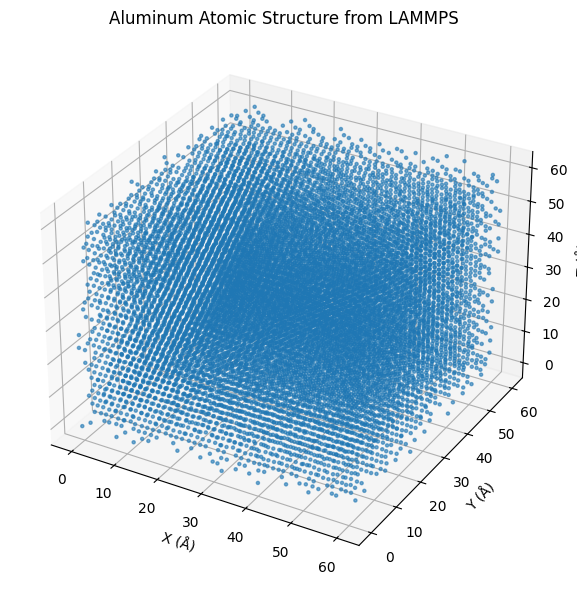

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

positions = []
reading_atoms = False
atom_section_started = False

# ✅ Use correct file name
with open("al.dat.out") as file:
    for line in file:
        if "Atoms # atomic" in line:
            reading_atoms = True
            continue
        if reading_atoms:
            # Skip blank lines after header
            if not atom_section_started:
                if line.strip() == "":
                    continue
                else:
                    atom_section_started = True  # Start reading actual data

            # Stop at the next section or unexpected line
            if line.strip() == "" or line[0].isalpha():
                print("Reached end of Atoms section.")
                break

            parts = line.strip().split()
            if len(parts) >= 5:
                try:
                    x, y, z = float(parts[2]), float(parts[3]), float(parts[4])
                    positions.append([x, y, z])
                except ValueError:
                    print("Line skipped (bad float):", line.strip())
            else:
                print("Line skipped (too few columns):", line.strip())

positions = np.array(positions)
print(f"✅ Total atoms read: {len(positions)}")

# Plot if data is valid
if positions.ndim == 2 and positions.shape[1] == 3:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], s=5, alpha=0.6)

    ax.set_xlabel('X (Å)')
    ax.set_ylabel('Y (Å)')
    ax.set_zlabel('Z (Å)')
    ax.set_title('Aluminum Atomic Structure from LAMMPS')

    plt.tight_layout()
    plt.show()
else:
    print("❌ Error: No valid atomic coordinates found.")
